
# CODES ON BYTES DATA SCIENCE INTERNSHIP - TASK 2:

## Clean the dataset replace missing values, remove outliers etc. Dataset :-

https://docs.google.com/spreadsheets/d/e/2PACX-1vTSS-TcErkXNk8KB0AlijhitwetxeHD2M3R0HJl2QPMAyFq0fxFX4PFKnzAWLDnratIz67DNL6GsZnV/pub?output=csv

In [89]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df=pd.read_csv("C:\\Users\\rishi\\Downloads\\dataset - netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [91]:
df.shape

(8790, 10)

In [92]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [94]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [95]:
df.duplicated().sum()

0

In [96]:
#cheack for null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [97]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

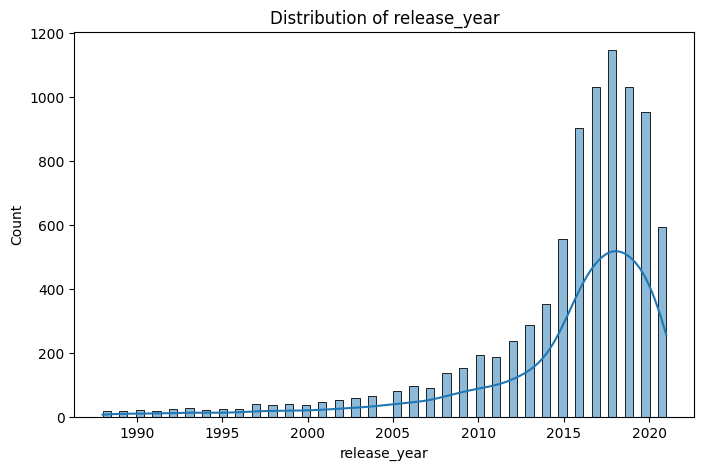

In [104]:
# Visualize the distribution of numerical features before  removing outliers

numerical_columns = df.select_dtypes(include=[np.number]).columns

# Visualize the distribution of numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [110]:
# Check for outliers in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_count = 0
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count += ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

if outliers_count == 0:
    print("No outliers found in numerical columns after cleaning.")
else:
    print(f"There are {outliers_count} outliers found in numerical columns after cleaning.")

There are 223 outliers found in numerical columns after cleaning.


In [111]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = ((df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)).any(axis=1)
df = df[~outlier_mask]

# Save the cleaned dataset
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

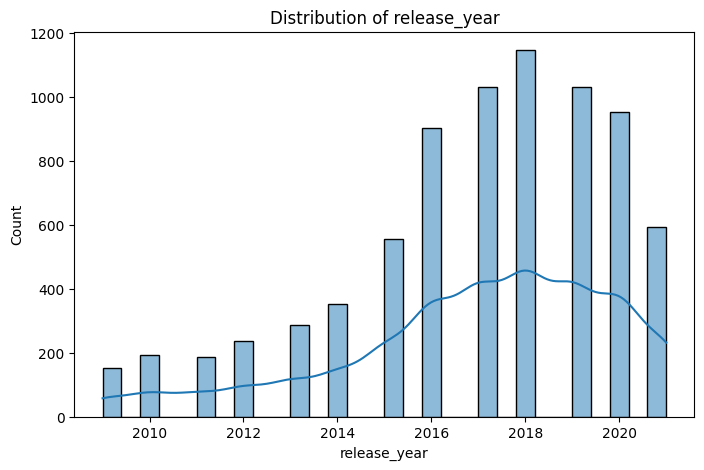

In [112]:
# Visualize the distribution of numerical features before  removing outliers

numerical_columns = df.select_dtypes(include=[np.number]).columns

# Visualize the distribution of numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [113]:
# Check for outliers in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_count = 0
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count += ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

if outliers_count == 0:
    print("No outliers found in numerical columns after cleaning.")
else:
    print(f"There are {outliers_count} outliers found in numerical columns after cleaning.")


No outliers found in numerical columns after cleaning.


In [114]:
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values found after cleaning.")
else:
    print(f"There are {missing_values} missing values in the cleaned dataset.")

No missing values found after cleaning.
